In [1]:
import os
import sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


## Generate fake data

In [6]:
def sin_wave(A, f, fs, phi, t, seed):
    '''
    params A: amplitude
    params f: frequency
    params fs: frequency sample rate
    params phi: phase
    params t: time
    '''
    random.seed(seed)
    Ts = 1/fs #采样时间间隔
    n = t/Ts
    y = A*np.sin(2*np.pi*(f + 0.4*random.random() -0.2)*t + phi*(np.pi/180)) + random.random()
    return y

epochs = 1000

sample frequnecy = 512

response-locked data -1s - 1s

In [46]:
for i in range(1000):
    seed = i
    fs = 512
    time = np.arange(-1,1,1/fs)
    chan1 = sin_wave(A = 1, f = 0.25, fs = fs, phi = 90, t = time, seed = seed)
    chan2 = sin_wave(A = 0.8, f = 0.2, fs = fs, phi = 100, t = time, seed = seed)
    chan3 = sin_wave(A = 0.9, f = 0.3, fs = fs, phi = 70, t = time, seed = seed)

    mat_tmp = np.array([[time,chan1],[time,chan2],[time,chan3]])
    
    mat_tmp = mat_tmp.transpose(2,1,0)
    
    mat_tmp = np.expand_dims(mat_tmp, axis = 3)
    if i == 0:
        mat = mat_tmp
    else:
        mat = np.concatenate((mat,mat_tmp),axis = 3)

mat = mat.transpose(0,1,3,2)

epochs = 1000

sample frequnecy = 512

stimulus-locked data -0.5s - 0

In [88]:
cue_mat = np.zeros([256,2,1000,3])

cue_mat[:,0,:,:] = np.reshape(np.arange(-0.5,0,1/fs),(256,1,1))

# O’Connell et al., 2012

The CPP analysis consisted simply of averaging the single-trial waveforms, which were baseline-corrected relative to the 500-ms interval before target onset.

In [96]:
# average the single-trial waveforms
mat_average = np.mean(mat, axis = 2)

# baseline 
cue_mat_average = np.mean(cue_mat,axis = 2)

baseline = np.mean(cue_mat_average, axis = 0)

CPP_amplitude = mat_average[:,1,:] - baseline[0,:]

CPP amplitude and latency measures were taken from the average of three electrodes centered on standard site CPz..

In [97]:
CPP_amplitude = np.mean(CPP_amplitude, axis = 1)

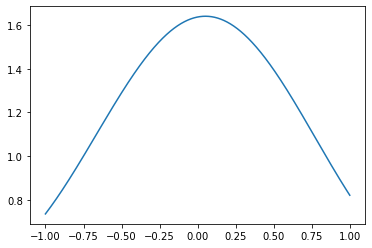

In [99]:
plt.plot(time, CPP_amplitude)